In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preprocessed_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3000 non-null   int64  
 1   app_name         3000 non-null   object 
 2   category         3000 non-null   object 
 3   screen_time_min  3000 non-null   float64
 4   launches         3000 non-null   float64
 5   interactions     3000 non-null   float64
 6   is_productive    3000 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 143.7+ KB


In [4]:
df.describe()

,user_id,screen_time_min,launches,interactions
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1049.800667,29.910393,1.994667,4.964000
std,29.406369,30.474856,1.401889,2.219237
min,1000.000000,0.010000,0.000000,0.000000
25%,1024.000000,8.715000,1.000000,3.000000
50%,1049.000000,20.930000,2.000000,5.000000
75%,1076.000000,40.265000,3.000000,6.000000
max,1100.000000,218.390000,9.000000,13.000000


In [5]:
app_user_counts = df.groupby('app_name')['user_id'].nunique().sort_values()


In [6]:
app_user_counts.columns = ['app_name', 'total_users']
print(app_user_counts)

app_name
Notion             70
Twitter            71
Instagram          71
TikTok             71
Camera             72
Evernote           75
Google Maps        75
Microsoft Teams    76
Weather            77
Twitch             77
Slack              78
Spotify            78
Facebook           80
Snapchat           80
YouTube            81
WhatsApp           81
Google Docs        82
Chrome             82
Gmail              84
Netflix            85
Name: user_id, dtype: int64


In [7]:
productivity_of_apps = df.groupby('app_name')['is_productive'].sum()
print(productivity_of_apps)

app_name
Camera               0
Chrome               0
Evernote           153
Facebook             0
Gmail                0
Google Docs        162
Google Maps          0
Instagram            0
Microsoft Teams    150
Netflix              0
Notion             127
Slack              161
Snapchat             0
Spotify              0
TikTok               0
Twitch               0
Twitter              0
Weather              0
WhatsApp             0
YouTube              0
Name: is_productive, dtype: int64


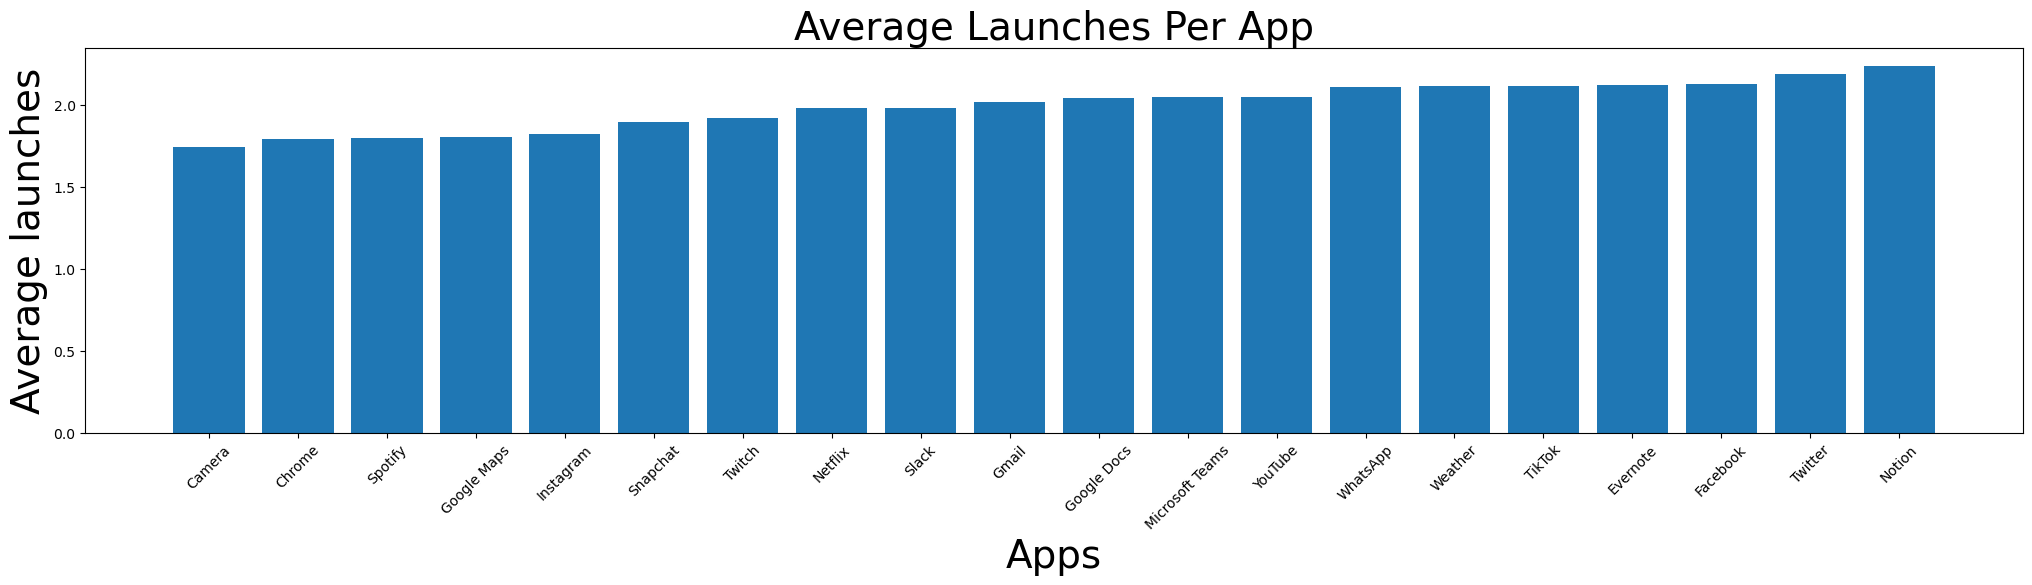

In [8]:
x=df['app_name'].unique()
y=df.groupby('app_name')['launches'].mean().sort_values()
plt.figure(figsize=(25,5))
plt.bar(x,y)
plt.xlabel('Apps', fontsize=28)
plt.ylabel('Average launches', fontsize=28)
plt.title('Average Launches Per App', fontsize=28)
plt.xticks(rotation=45)  
plt.show()

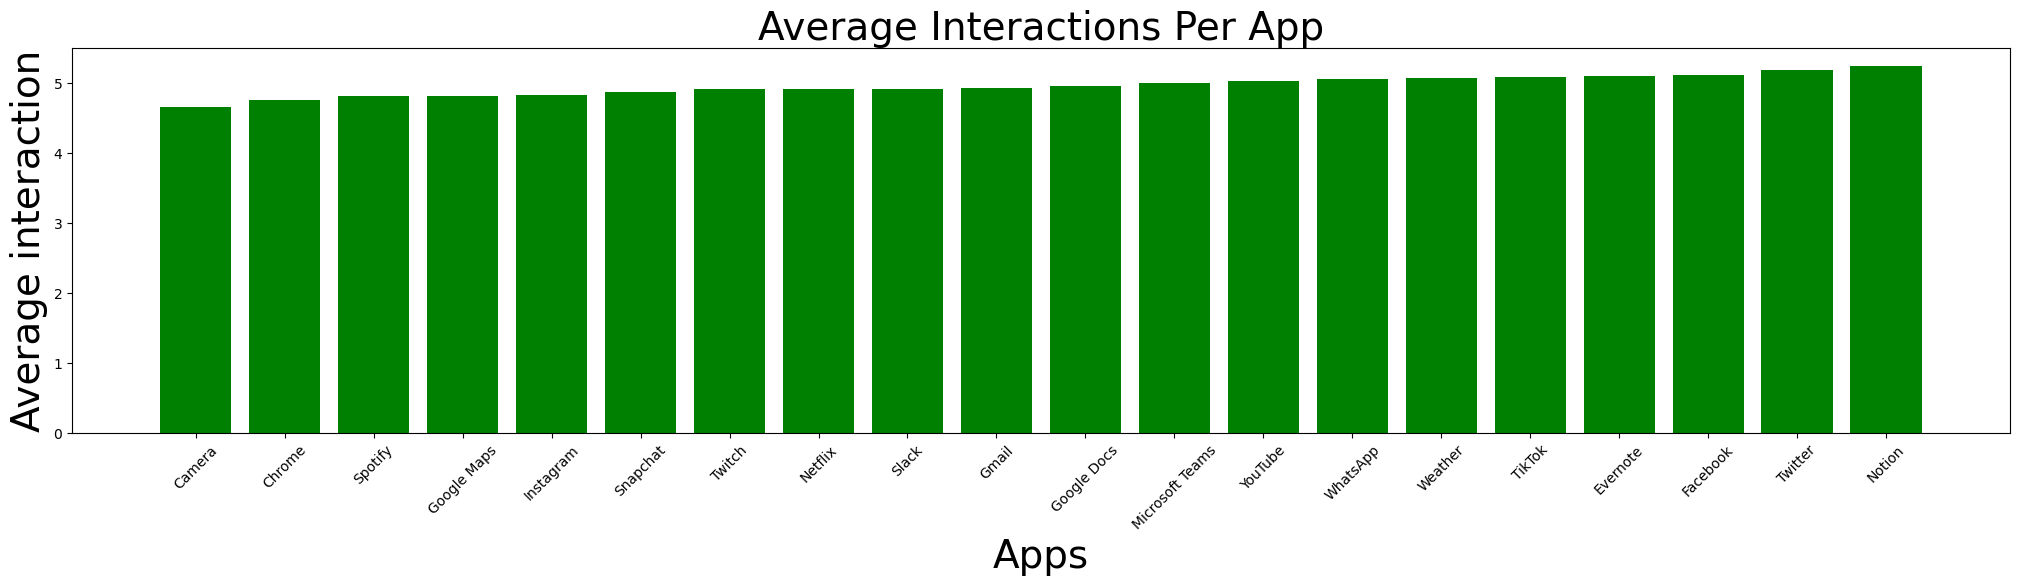

In [9]:
x=df['app_name'].unique()
y=df.groupby('app_name')['interactions'].mean().sort_values()
plt.figure(figsize=(25,5))
plt.bar(x,y,color='g')
plt.xlabel('Apps', fontsize=28)
plt.ylabel('Average interaction', fontsize=28)
plt.title('Average Interactions Per App', fontsize=28)
plt.xticks(rotation=45)  
plt.show()

In [10]:
total_app_usage=df.groupby('user_id')['launches'].sum()
print(total_app_usage)

user_id
1000    61.0
1001    64.0
1002    63.0
1003    72.0
1004    66.0
        ... 
1096    90.0
1097    52.0
1098    36.0
1099    77.0
1100    47.0
Name: launches, Length: 101, dtype: float64


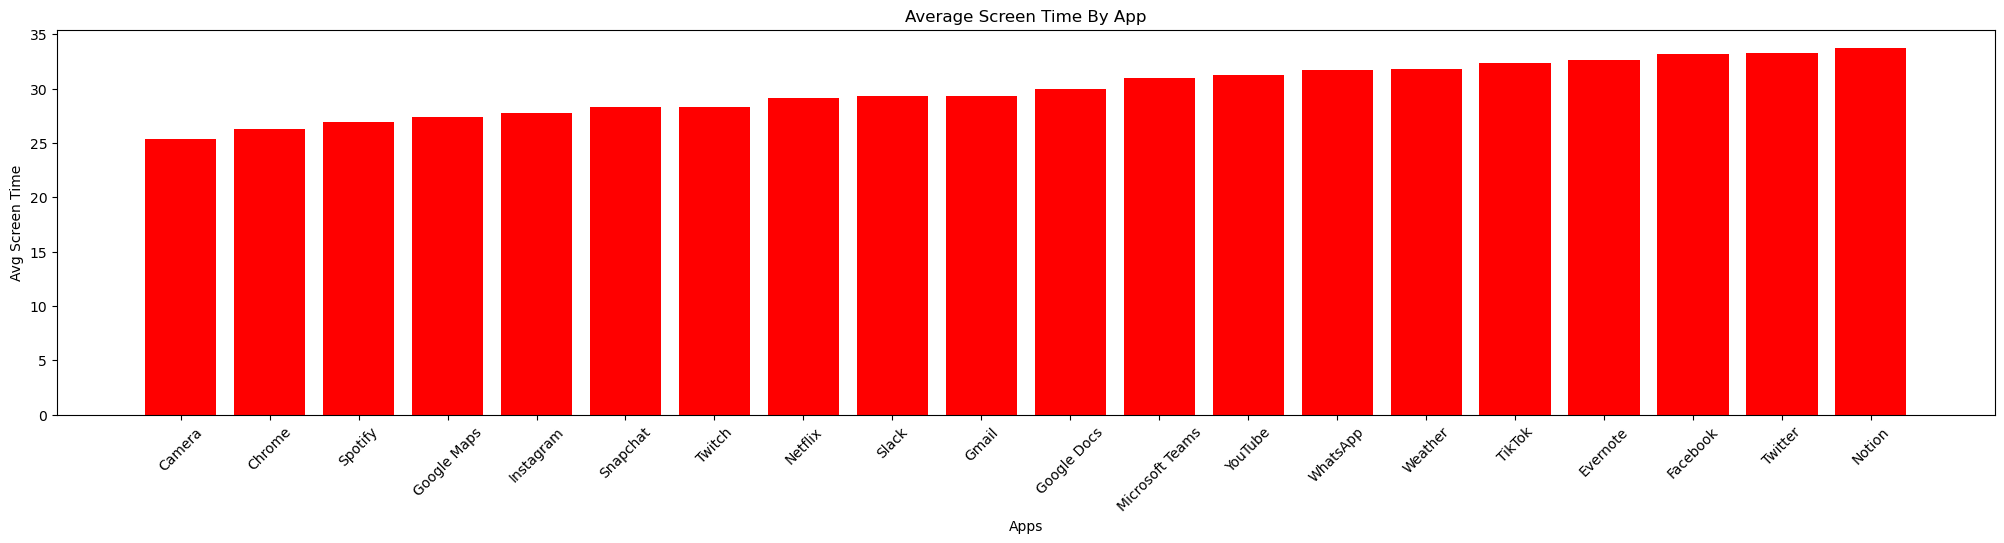

In [11]:
x=df['app_name'].unique()
y=df.groupby('app_name')['screen_time_min'].mean().sort_values()
plt.figure(figsize=(25,5))
plt.bar(x,y,color='r')
plt.title('Average Screen Time By App')
plt.xlabel('Apps')
plt.ylabel('Avg Screen Time')
plt.xticks(rotation=45) 
plt.show()


In [12]:
x=df.groupby('category')['app_name'].unique()
print(x)

category
Entertainment          [Spotify, Twitch, Netflix, YouTube, TikTok]
Productivity     [Slack, Google Docs, Microsoft Teams, Evernote...
Social           [Instagram, Snapchat, WhatsApp, Facebook, Twit...
Utilities            [Camera, Chrome, Google Maps, Gmail, Weather]
Name: app_name, dtype: object


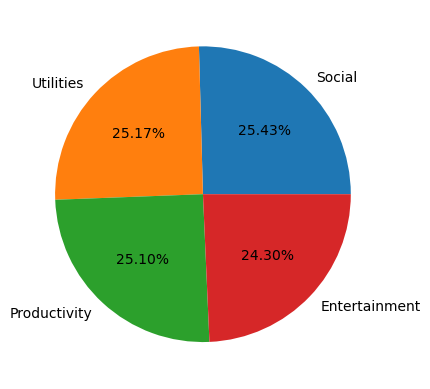

In [13]:
series1=pd.Series(df['category'])
counts = series1.value_counts()
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=counts.index, autopct='%0.2f%%',radius=1)
plt.show()

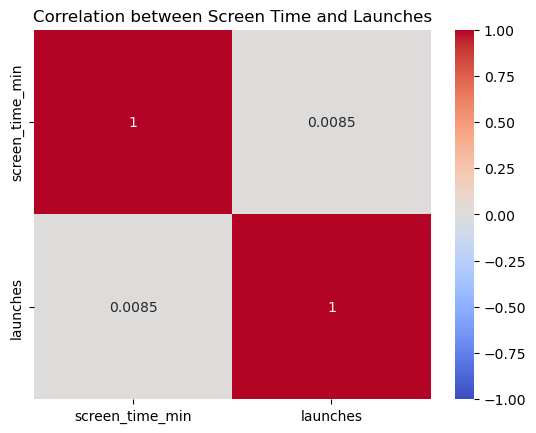

In [14]:
corr_matrix = df[['screen_time_min', 'launches']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Screen Time and Launches')
plt.show()

**Number of Entries:** 3,000

**Features:**

user_id (int): Unique identifier for each user

app_name (object): Name of the applications used

category (object): App category, such as Entertainment, Productivity, Social, Utilities

screen_time_min (float): Total screen time in minutes

launches (float): Number of app launches

interactions (float): Number of interactions within apps

is_productive (bool): Indicates whether the usage was productive

**Application Usage Insights**

**App Categories**

Entertainment: Includes apps like Spotify, Twitch, Netflix, YouTube, TikTok.

Productivity: Includes Slack, Google Docs, Microsoft Teams, Evernote, Notion.

Social: Includes Instagram, Snapchat, WhatsApp, Facebook, Twitter.

Utilities: Includes Camera, Chrome, Google Maps, Gmail, Weather.

App Distribution

The apps are grouped into four main categories, each containing several popular apps.

Usage patterns across categories can be analyzed further to understand user preferences and focus areas.

**Key Insights & Observations**

Notion has least number of total users 70 and Netflix has maximum of 85.

The maximun average launches and interactions are of Notion and Camera has the least launches and interactions average.

Notion, Twitch and Facebook have the maximum average screen time.

As the correlation value between screen time and launches is 0.0085, It indicates a very weak or negligible linear relationship between screen time and launches. Essentially, it suggests that there is little to no linear association between the two variables in your data.

